In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/220224_lung_cancer_processing.h5ad'

In [4]:
adata = sc.read_text('/mnt/d/Nishino/DRY/data/analysis/Omar_san/lung_cancer_raw_data/GSE131907_Lung_Cancer_raw_UMI_matrix.txt')   

In [5]:
adata

AnnData object with n_obs × n_vars = 29634 × 208506

In [6]:
adata = adata.T

In [7]:
adata.obs

""
AAACCTGAGAAACCGC_LN_05
AAACCTGAGAAACGCC_NS_13
AAACCTGAGAAGGTGA_LUNG_N18
AAACCTGAGACAAAGG_LUNG_N18
AAACCTGAGACATAAC_LN_04
...
TTTGTCATCTTGCCGT_LUNG_T30
TTTGTCATCTTGTATC_EFFUSION_13
TTTGTCATCTTTACAC_LUNG_N20
TTTGTCATCTTTACAC_LUNG_T25


In [8]:
adata.var

""
A1BG
A1BG-AS1
A1CF
A2M
A2M-AS1
...
ZYX
ZZEF1
ZZZ3
bP-21264C1.2


normalizing counts per cell
    finished (0:00:33)


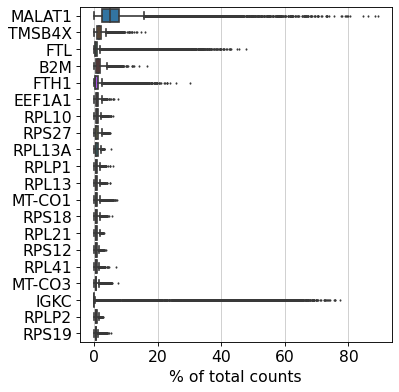

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [10]:
adata.write('/mnt/d/Nishino/DRY/data/analysis/Omar_san/220224_lung_cancer_scanpy/write/lungcancer_raw_5had.5had')

In [11]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 

In [12]:
adata.var

,mt
A1BG,False
A1BG-AS1,False
A1CF,False
A2M,False
A2M-AS1,False
...,...
ZYX,False
ZZEF1,False
ZZZ3,False
bP-21264C1.2,False


In [13]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

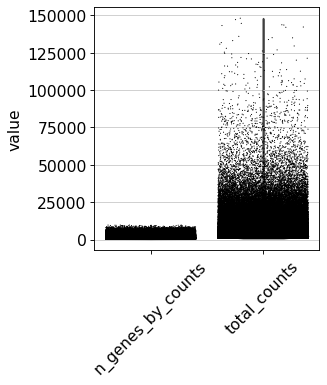

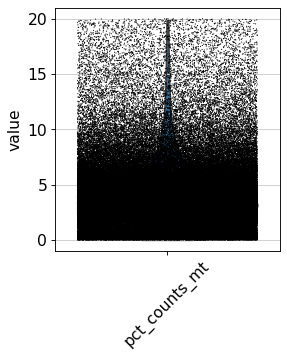

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, rotation= 45)
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4, rotation= 45)

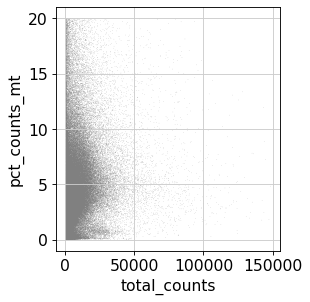

In [15]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2056 genes that are detected in less than 3 cells


In [17]:
adata

AnnData object with n_obs × n_vars = 208506 × 27578
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [18]:
count_data=sc.get.obs_df(adata, keys=["CD68","MSR1","MAFB"])
count_data.to_csv('220331_raw_count_data_for_fishers_exact_test.tsv', sep='\t', index = True)

In [19]:
adata_lungN = adata[adata.obs_names.str.contains('LUNG_N'),:]
adata_lungT = adata[adata.obs_names.str.contains('LUNG_T'),:]
adata_Tumor_IV = adata[adata.obs_names.str.contains('EBUS_06') | adata.obs_names.str.contains('EBUS_28') | adata.obs_names.str.contains('EBUS_49') | adata.obs_names.str.contains('BRONCHO_58'),:]

In [20]:
adata_lungN

View of AnnData object with n_obs × n_vars = 42995 × 27578
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [21]:
adata_lungT

View of AnnData object with n_obs × n_vars = 45149 × 27578
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [22]:
adata_Tumor_IV

View of AnnData object with n_obs × n_vars = 12073 × 27578
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [23]:
sc.get.obs_df(adata_lungN, keys=['CCR2','MAFB']).to_csv('220813_normal_lung_CCR2.tsv', sep='\t', index = True)
sc.get.obs_df(adata_lungT, keys=['CCR2','MAFB']).to_csv('220813_stageI_CCR2.tsv', sep='\t', index = True)
sc.get.obs_df(adata_Tumor_IV, keys=['CCR2','MAFB']).to_csv('220813_stageIV_CCR2.tsv', sep='\t', index = True)